Analyze histogram of the images and if we can use it to detect where are the detect candidates

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/

Mounted at /content/drive
/content/drive


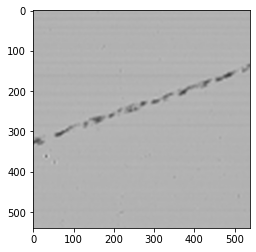

In [43]:
sample_image1 = cv2.imread("/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/1.jpg")
plt.imshow(sample_image1)
 

Histogram Calculation in Open CV

In [6]:
img = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/1.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,255])

Histogram Calculation in Numpy

In [75]:
hist, bin = np.histogram(img.ravel(),256,[0,256])

<function matplotlib.pyplot.show(*args, **kw)>

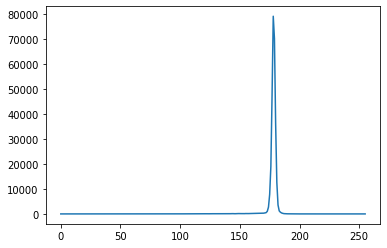

In [83]:
plt.plot(bin[0:-1],hist)
plt.show

Plotting Histograms

1. Using Matplotlib

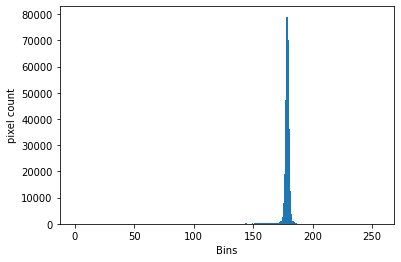

In [29]:
plt.hist(img.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

  2.Using Open CV

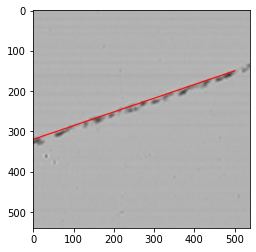

In [42]:
image1 = sample_image1.copy()
line_ = cv2.line(image1,(0,320),(500,150),256,2)
plt.imshow(line_)

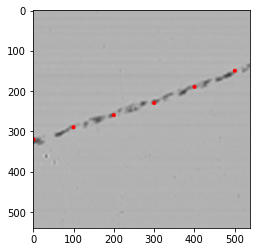

In [70]:
image2 = sample_image1.copy()
pts = np.array([[1,320],[100,290],[200,260],[300,230],[400,190],[500,150]], np.int32)
pts = pts.reshape((-1,1,2))
polyline_ = cv2.polylines(image2,pts,True,256,10)
plt.imshow(polyline_)

Application of Mask

In [31]:
def mask(img,x1,y1,x2,y2):

  #create a mask
  mask = np.zeros(img.shape[:2], np.uint8)
  mask[x1:y1, x2:y2] = 255
  masked_img = cv2.bitwise_and(img, img, mask=mask)

  #calculate histogram with and without mask
  #check third agrgument for mask
  hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
  hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

  plt.subplot(221) , plt.imshow(img, 'gray')
  plt.subplot(222) , plt.imshow(mask, 'gray')
  plt.subplot(223) , plt.imshow(masked_img, 'gray')
  plt.subplot(224) , plt.plot(hist_full) , plt.plot(hist_mask)
  plt.xlabel("Bins")
  plt.ylabel("pixel count")
  plt.xlim([0,256])
  plt.show()

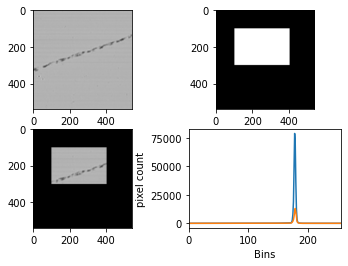

In [32]:
mask(sample_image1,100,300,100,400)

In [ ]:
 sample_image2 = cv2.imread("/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/sample_2.bmp")

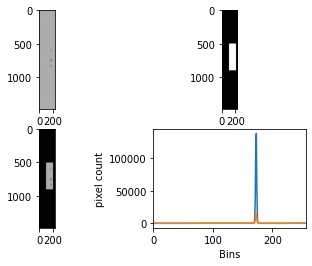

In [33]:
mask(sample_image2,500,900,100,200)

1477
(1477, 228, 3)


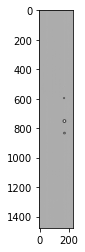

In [18]:
sample_image2 = cv2.imread("/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/sample_2.bmp")
print(len(sample_image2))
print(sample_image2.shape)
plt.imshow(sample_image2)